In [13]:
import axisrules as axis
import mapel.elections as mapel
import numpy as np
import math

Note : I am not conviced by the approval map for now, because of the distance they used. For instance for the IC-0.5 point, it is associated to the approval score vector (n/2, ..., n/2). For this approval score, you could have Voter Deletion cost of 0%, but also of 1-(E(m/2)+1)/(E(m/2) choose m). (Euclidean top-k) For m = 10, this is 41/42 > 97% (probably the highest achievable cost for this m). However, the map could be useful to represent some dataset of particular models. However, I am not sure how to represent other datasets?

Note : For the 3 other corners, the cost is always 0. 

Note : I would like to generate the map but for m small (10 ? 6 ?)

Note : Add my real datasets of approval to this map. For french assembly, I found p = 0.46 and phi = 20% (very on the left), where the VD cost is supposed to be high (but it is not really the case for us).

=============

It seems to me that this distance for the map has several drawbacks.

1) First of all, I want to question its correlation with Hammign distance. I believe they are correlated, but not as much as claim in  the paper. It is mostly due to the choices of models. The best dataset would be real data.

2) The map is not "flat". By this I mean the following. A point on the map correspond to an approval score vector (s_1, ... s_m) with s_1 being the highest and s_m the lowest approval score. Each point on the map does not correspond to one profile of course, and this is fine, because we are in 2D so there are not much choice. However, what bugs me is that for some point you have a lot of possible profiles, and for other, only a few. Consider the resampling model for instance. In which you have m candidates, n voters, phi and p parameters. The number of profiles for given parameters of phi, p is 

$$
{m \choose mp} \times {n \choose n((1-\phi) + \phi p)}^{mp} \times {n \choose n\phi p}^{m(1-p)}
$$

This means that, for Empty and Full, there exists only 1 profile, for ID-0.5, there exists ${m \choose m/2}$, and for IC-0.5, there are ${m \choose m/2}^{m+1}$ profiles, which is the highest of all possible profiles. With m = 10, this gives 252 for ID-0.5 and $2.6 \times 10^{26}$ for IC-0.5. It is not surprising then to see that most "interesting" stuff (hard computation, real datasets, etc.) happen on the left part of the map. But at the man time, it is very hard to represent $10^{26}$ profiles with one point only, as they all have different realities (see example of Voter Deletion for instance). 

3) Because each dot is represented buy its approval score vector, and the map is tailored for the resampling model, there is this kind of intuitive and easy assumption that you approximate the vector with a two-part ID vectors. However, this gives no room to other, maybe more natural (?) distribution of approval scores, for instance (n, (m-2)n/(m-1), ..., 0) (linar). This has the same distances to the four corners than the middle point of the map. However, it also has distance m/8 to this middle point. Thus, where should we put it? I understand that this question is not specific to this distance, and will arise with every distance (it is the drawback of having only a 2D plane), but can we reduce this?

4) This maps only care about candidates, and forget everything about the structure of the voters. It is surprising to me, has two of the metrics studied in the original papers are about cohesiveness of the voters. But this map structure does not say anything about how the voter behave, which is - in my opinion - an important part of the profile, and should be considered. In particular, the interpretation of the map dimensions are only about candidates (i) average approval score (ii) inequalities in the distribution of approval score. This being said, the converse distance (looking at voters instead of candidates), would not be better (maybe worse) as it would only focus on voters and forget everything about voters, the map would be even less interpretable and have the same problems mentioned above.

A proposal distance would be the following :

A profile is represented by its co-approval matrix $M[i,j] = |A(i) \cap A(j)|/|A(i)|$. And the distance could be the minimal l1/l2 distance between two matrix, when we permute the order of the candidates in the matrix. It is clearly not perfect and might have several drawbacks that I did not analyse yet, but it seems to me that (1) it tells a bit about voters and a bit about candidates (2) the map would be more flat (to check). However, this would give a distance that is hard to compute. It would take $O(m!)$ for the bruteforce algorithm, which is still reasonable for small $m$ ($m \le 10$). The possible corners could be : of course the empty and full profiles. However, not that the empty profile only means that no candidates are co-approved, i.e. it is a plurality voting profile, and thus it already covers a lot of profiles (around m^n). Same for the full matrix, it means that there are two kind of ballots : full or empty, and there are $2^n-1$ profiles like this. In between, you would have the profile where every co-approval is $0.5$, which would correspond to the IC-0.5 model. On the left side, one could put the triangular matrix, which correspond to... $0$ profiles (because it would mean that $c_1$ approved implies $c_2$ approved however $c_1$ is never approved when $c_2$ is and thus there is a contraduction) but some profiles tend to be close to it. On the other side, we could have the bipolar profile (two blocs taking half the size). It would be at the same distance from the full, empty, and IC-0.5. The ID-0.5 would be even further on the right, and also down, because ID-0.5 correspond to a co-approval matrix with only a subset of the candidates always approved together (a subblock). Thus its distance it smaller from the Empty than the Full matrix (for p = 0.5).


Note : For the axis part about parliament, cite "When candidates votes on voters"

Note : model that I could use for the axis:
* Disjoint model
* Variant of resampling where each interval of length mp has the same initial probability to be selected => Note that they will be on the left border of the map, even when phi varies (not true with co-approval !, not true with hamming !)



In [3]:
def votes2approval(election):
    approval = np.zeros((election.num_voters,election.num_candidates))
    for i, vote in enumerate(election.votes):
        for x in vote:
            approval[i, x] = 1
    
    return approval

In [31]:
election = mapel.generate_approval_election(
culture_id='ic',   
num_candidates=12, num_voters=10,params={'p':0.5})
votes2approval(election)


array([[1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1.],
       [0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0.],
       [0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1.],
       [1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0.],
       [0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1.],
       [0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0.]])

100%|██████████| 241/241 [00:01<00:00, 177.88it/s]


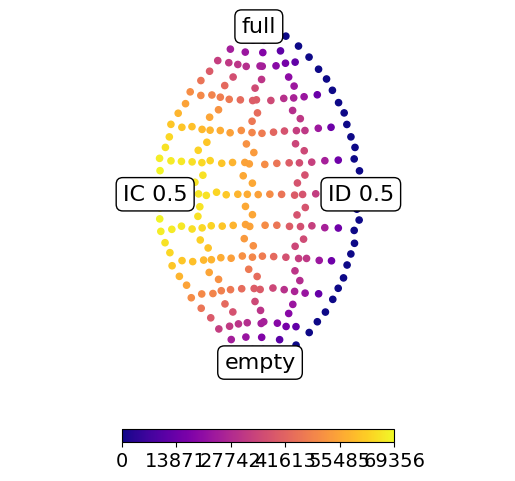

In [27]:

def my_feature(election) -> dict:
    """ implement your feature here """
    app = votes2approval(election).sum(0)
    prod = 0
    curr_el = 1
    n = election.num_voters
    m = election.num_candidates
    for i in range(1,len(app)):
        if app[i] == app[i-1]:
            curr_el += 1
        else:
            prod += np.log(float(math.comb(m, curr_el))) + np.log(float(math.comb(n, int(app[i-1]))))*curr_el
            curr_el = 1

    prod += np.log(float(math.comb(m, curr_el))) + np.log(float(math.comb(n, int(app[-1]))))*curr_el
    return {'value': prod}

experiment_id = 'resampling'    # or disjoint or noise or truncated_urn
distance_id = 'l1-approvalwise'
embedding_id = 'fr'
experiment = mapel.prepare_offline_approval_experiment(experiment_id=experiment_id,
                                                           distance_id=distance_id,
                                                           embedding_id=embedding_id)

experiment.add_feature('my_feature', my_feature)
experiment.compute_feature('my_feature')

experiment.print_map_2d_colored_by_feature(
        cmap='plasma',
        feature_id='my_feature',
        textual=['empty', 'full', 'ID 0.5', 'IC 0.5'],
        rounding=0,
    )

100%|██████████| 241/241 [00:33<00:00,  7.29it/s]


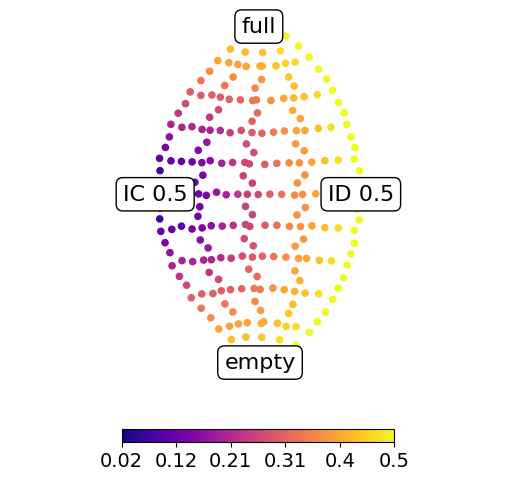

In [9]:

def my_feature(election) -> dict:
    """ implement your feature here """
    score = 0
    app = votes2approval(election)
    co_approval = np.zeros((election.num_candidates, election.num_candidates))
    for i in range(election.num_candidates):
        for j in range(election.num_candidates):
            if np.sum(app[:,i]) == 0:
                co_approval[i,j] = 0
            else:
                co_approval[i,j] = np.sum(np.logical_and(app[:,i], app[:,j]))/np.sum(app[:,i])

    score = np.sum(np.abs(co_approval-0.5))
    return {'value': score/(100*100)}

experiment_id = 'resampling'    # or disjoint or noise or truncated_urn
distance_id = 'l1-approvalwise'
embedding_id = 'fr'
experiment = mapel.prepare_offline_approval_experiment(experiment_id=experiment_id,
                                                           distance_id=distance_id,
                                                           embedding_id=embedding_id)

experiment.add_feature('my_feature', my_feature)
experiment.compute_feature('my_feature')

experiment.print_map_2d_colored_by_feature(
        cmap='plasma',
        feature_id='my_feature',
        textual=['empty', 'full', 'ID 0.5', 'IC 0.5'],
        rounding=2,
    )



100%|██████████| 491/491 [01:02<00:00,  7.87it/s]
c:\Users\teoz0\AppData\Local\Programs\Python\Python311\Lib\site-packages\mapel\core\printing.py:656: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  images.append(ax.scatter(xx[masks], yy[masks],


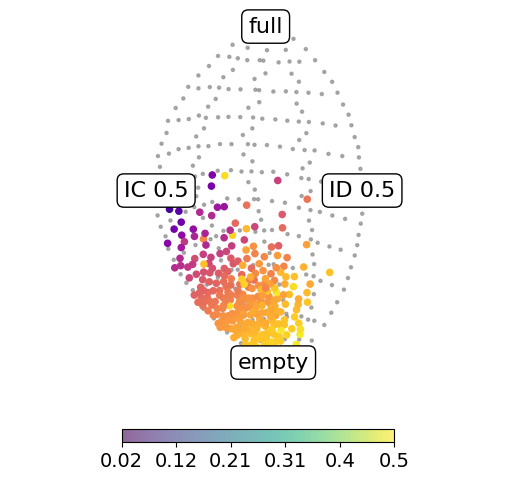

In [10]:
experiment_id = 'disjoint'    # or disjoint or noise or truncated_urn
distance_id = 'l1-approvalwise'
embedding_id = 'fr'
experiment = mapel.prepare_offline_approval_experiment(experiment_id=experiment_id,
                                                           distance_id=distance_id,
                                                           embedding_id=embedding_id)

experiment.add_feature('my_feature', my_feature)
experiment.compute_feature('my_feature')

experiment.print_map_2d_colored_by_feature(
        cmap='plasma',
        feature_id='my_feature',
        textual=['empty', 'full', 'ID 0.5', 'IC 0.5'],
        rounding=2,
    )


100%|██████████| 466/466 [01:05<00:00,  7.14it/s]


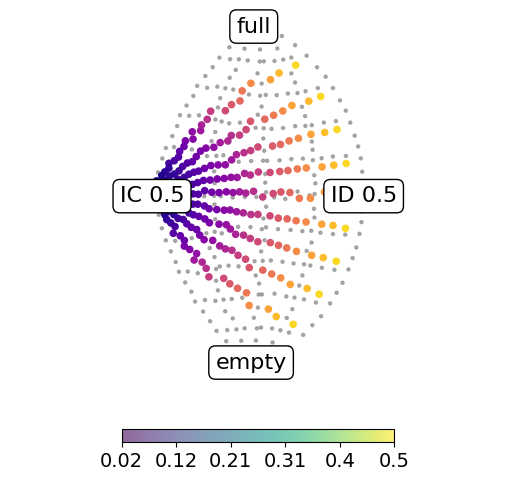

In [11]:
experiment_id = 'noise'    # or disjoint or noise or truncated_urn
distance_id = 'l1-approvalwise'
embedding_id = 'fr'
experiment = mapel.prepare_offline_approval_experiment(experiment_id=experiment_id,
                                                           distance_id=distance_id,
                                                           embedding_id=embedding_id)

experiment.add_feature('my_feature', my_feature)
experiment.compute_feature('my_feature')

experiment.print_map_2d_colored_by_feature(
        cmap='plasma',
        feature_id='my_feature',
        textual=['empty', 'full', 'ID 0.5', 'IC 0.5'],
        rounding=2,
    )


100%|██████████| 466/466 [00:57<00:00,  8.09it/s]


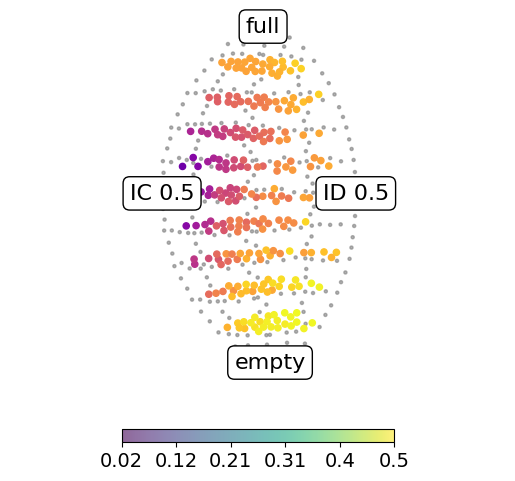

In [12]:
experiment_id = 'truncated_urn'    # or disjoint or noise or truncated_urn
distance_id = 'l1-approvalwise'
embedding_id = 'fr'
experiment = mapel.prepare_offline_approval_experiment(experiment_id=experiment_id,
                                                           distance_id=distance_id,
                                                           embedding_id=embedding_id)

experiment.add_feature('my_feature', my_feature)
experiment.compute_feature('my_feature')

experiment.print_map_2d_colored_by_feature(
        cmap='plasma',
        feature_id='my_feature',
        textual=['empty', 'full', 'ID 0.5', 'IC 0.5'],
        rounding=2,
    )


100%|██████████| 241/241 [00:54<00:00,  4.46it/s]


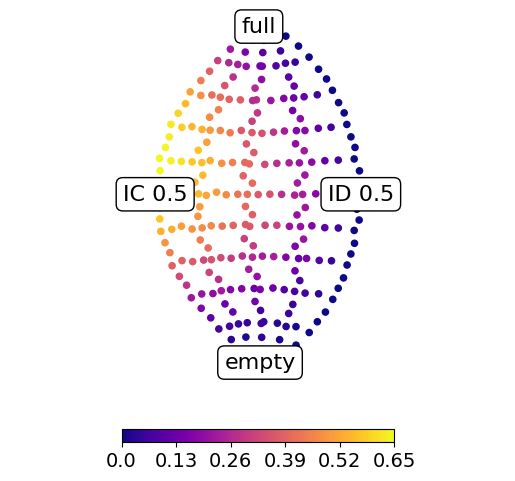

In [10]:

def my_feature(election) -> dict:
    """ implement your feature here """
    score = 0
    for _ in range(10):
        selected = np.random.choice(100, 6, replace=False)
        app = votes2approval(election)[:,selected]
        rule = axis.VoterDeletion(app)
        best_axis = rule.bruteforce()
        score += rule.get_score(best_axis[0][0])

    return {'value': score/(1000*10)}

experiment_id = 'resampling'    # or disjoint or noise or truncated_urn
distance_id = 'l1-approvalwise'
embedding_id = 'fr'
experiment = mapel.prepare_offline_approval_experiment(experiment_id=experiment_id,
                                                           distance_id=distance_id,
                                                           embedding_id=embedding_id)

experiment.add_feature('my_feature', my_feature)
experiment.compute_feature('my_feature')

experiment.print_map_2d_colored_by_feature(
        cmap='plasma',
        feature_id='my_feature',
        textual=['empty', 'full', 'ID 0.5', 'IC 0.5'],
        rounding=2,
    )




1 1 0 0 => 1 1 0 0
1 0 1 0 => 0 1 1 0
1 0 0 1 => 1 1 0 0
0 1 1 0 => 0 1 1 0  
0 1 0 1 => 0 0 1 1 
0 0 1 1 => 0 0 1 1 
AvgHamming = 1/4
1 1 0 0 => 0
1 1 0 0 => 2
1 1 0 0 => 4
avg = 2/4 = 1/2
1 1 1 0 0 0 => 0 (0)
1 1 0 1 0 0 => 0/(1) (2)
1 1 0 0 1 0 => 0 (2)
1 1 0 0 0 1 => 0 (2)
1 0 1 1 0 0 => (0)/1/2 (2)
1 0 1 0 1 0 => 0/(2) (2)
1 0 1 0 0 1 => 0 (2)
1 0 0 1 1 0 => (2)/3 (2)
1 0 0 1 0 1 => 3 (2)
1 0 0 0 1 1 => 3 (2)
0 1 1 1 0 0 => 1 (0)
0 1 1 0 1 0 => 0/(1)/2 (2)
0 1 1 0 0 1 => 0/(1) (2)
0 1 0 1 1 0 => 1/(2)/3 (2)
0 1 0 1 0 1 => (1)/3 (2)
0 1 0 0 1 1 => 3 (2)
0 0 1 1 1 0 => 2 (0)
0 0 1 1 0 1 => 1/2/(3) (2)
0 0 1 0 1 1 => (2)/3 (2)
0 0 0 1 1 1 => 3 (0)

20 / 4 => 5 par pos
0 xxxxx
1 xxxxx
2 xxxxx
3 xxxxx

1/5*0
4/5*2

= 8/5 =1.6

8/30 = 4/15 = 0.26 > 1/4 
111000 => 0
011100 => 2
001110 => 4
000111 => 6
avg = 3/6 => 1/2



100%|██████████| 241/241 [00:05<00:00, 42.03it/s]


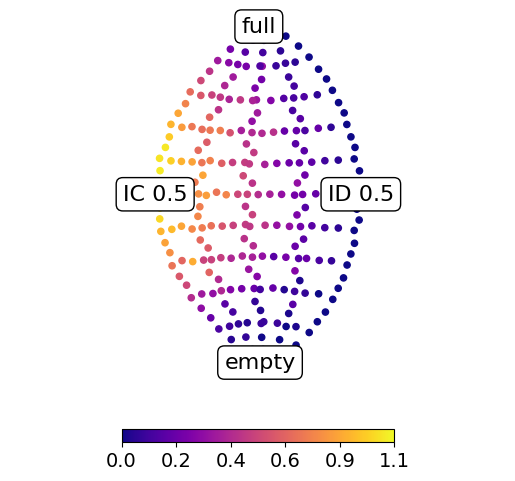

In [12]:

def my_feature(election) -> dict:
    """ implement your feature here """
    score = 0
    for _ in range(10):
        selected = np.random.choice(100, 6, replace=False)
        app = votes2approval(election)[:,selected]
        rule = axis.BallotCompletion(app)
        best_axis = rule.bruteforce()
        score += rule.get_score(best_axis[0][0])

    return {'value': score/(1000*10)}

experiment_id = 'resampling'    # or disjoint or noise or truncated_urn
distance_id = 'l1-approvalwise'
embedding_id = 'fr'
experiment = mapel.prepare_offline_approval_experiment(experiment_id=experiment_id,
                                                           distance_id=distance_id,
                                                           embedding_id=embedding_id)

experiment.add_feature('my_feature', my_feature)
experiment.compute_feature('my_feature')

experiment.print_map_2d_colored_by_feature(
        cmap='plasma',
        feature_id='my_feature',
        textual=['empty', 'full', 'ID 0.5', 'IC 0.5'],
        rounding=1,
    )


100%|██████████| 241/241 [00:07<00:00, 33.13it/s]


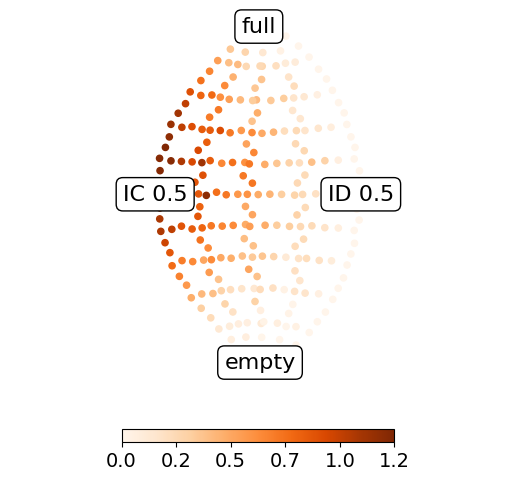

In [5]:

def my_feature(election) -> dict:
    """ implement your feature here """
    selected = np.random.choice(100, 6, replace=False)
    app = votes2approval(election)[:,selected]
    rule = axis.MinimalSwaps(app)
    best_axis = rule.bruteforce()
    score = rule.get_score(best_axis[0][0])

    return {'value': score/1000}

experiment_id = 'resampling'    # or disjoint or noise or truncated_urn
distance_id = 'l1-approvalwise'
embedding_id = 'fr'
experiment = mapel.prepare_offline_approval_experiment(experiment_id=experiment_id,
                                                           distance_id=distance_id,
                                                           embedding_id=embedding_id)

experiment.add_feature('my_feature', my_feature)
experiment.compute_feature('my_feature')

experiment.print_map_2d_colored_by_feature(
        cmap='Oranges',
        feature_id='my_feature',
        textual=['empty', 'full', 'ID 0.5', 'IC 0.5'],
        rounding=1,
    )

100%|██████████| 241/241 [00:06<00:00, 39.65it/s]


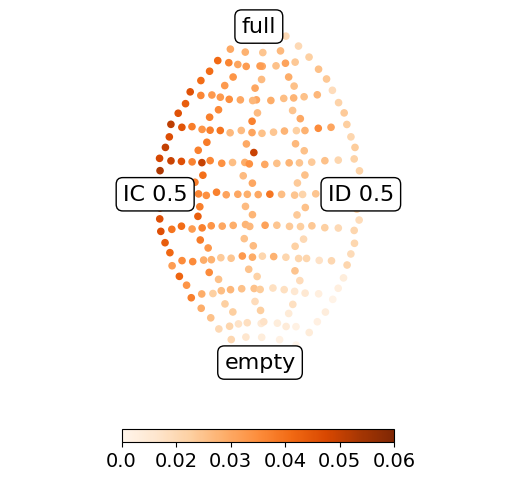

In [7]:
import time 


def my_feature(election) -> dict:
    """ implement your feature here """
    t1 = time.time()
    selected = np.random.choice(100, 6, replace=False)
    app = votes2approval(election)[:,selected]
    rule = axis.BallotCompletion(app)
    best_axis = rule.bruteforce()
    score = rule.get_score(best_axis[0][0])
    t2 = time.time()

    return {'value': t2-t1}

experiment_id = 'resampling'    # or disjoint or noise or truncated_urn
distance_id = 'l1-approvalwise'
embedding_id = 'fr'
experiment = mapel.prepare_offline_approval_experiment(experiment_id=experiment_id,
                                                           distance_id=distance_id,
                                                           embedding_id=embedding_id)

experiment.add_feature('my_feature', my_feature)
experiment.compute_feature('my_feature')

experiment.print_map_2d_colored_by_feature(
        cmap='Oranges',
        feature_id='my_feature',
        textual=['empty', 'full', 'ID 0.5', 'IC 0.5'],
        rounding=2,
    )

100%|██████████| 241/241 [00:04<00:00, 54.55it/s]


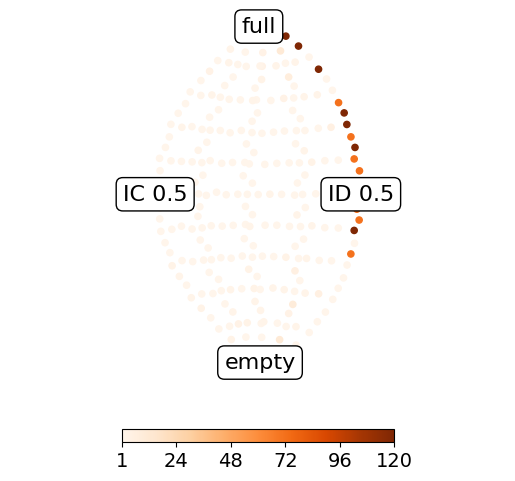

In [5]:

def my_feature(election) -> dict:
    """ implement your feature here """
    selected = np.random.choice(100, 6, replace=False)
    app = votes2approval(election)[:,selected]
    rule = axis.VoterDeletion(app)
    best_axis = rule.bruteforce()

    return {'value': len(best_axis)}

experiment_id = 'resampling'    # or disjoint or noise or truncated_urn
distance_id = 'l1-approvalwise'
embedding_id = 'fr'
experiment = mapel.prepare_offline_approval_experiment(experiment_id=experiment_id,
                                                           distance_id=distance_id,
                                                           embedding_id=embedding_id)

experiment.add_feature('my_feature', my_feature)
experiment.compute_feature('my_feature')

experiment.print_map_2d_colored_by_feature(
        cmap='Oranges',
        feature_id='my_feature',
        textual=['empty', 'full', 'ID 0.5', 'IC 0.5'],
        rounding=0,
    )

100%|██████████| 241/241 [00:07<00:00, 31.18it/s]


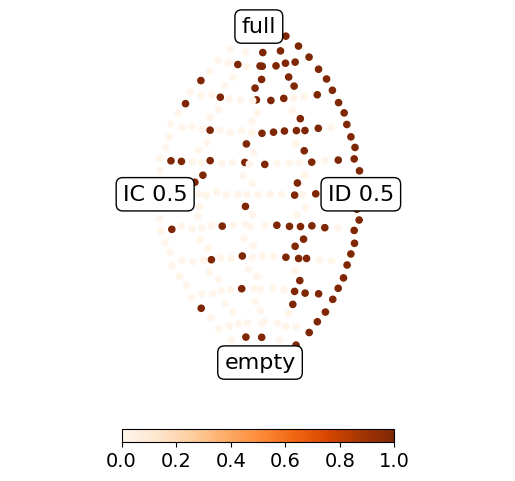

In [7]:

def my_feature(election) -> dict:
    """ implement your feature here """
    selected = np.random.choice(100, 6, replace=False)
    app = votes2approval(election)[:,selected]
    rule = axis.VoterDeletion(app)
    rule2 = axis.BallotCompletion(app)
    best_axis = rule.bruteforce()
    best_axis2 = rule2.bruteforce()
    score = 0
    if best_axis[0][0] == best_axis2[0][0]:
        score = 1

    return {'value': score}

experiment_id = 'resampling'    # or disjoint or noise or truncated_urn
distance_id = 'l1-approvalwise'
embedding_id = 'fr'
experiment = mapel.prepare_offline_approval_experiment(experiment_id=experiment_id,
                                                           distance_id=distance_id,
                                                           embedding_id=embedding_id)

experiment.add_feature('my_feature', my_feature)
experiment.compute_feature('my_feature')

experiment.print_map_2d_colored_by_feature(
        cmap='Oranges',
        feature_id='my_feature',
        textual=['empty', 'full', 'ID 0.5', 'IC 0.5'],
        rounding=2,
    )

100%|██████████| 241/241 [00:08<00:00, 29.77it/s]


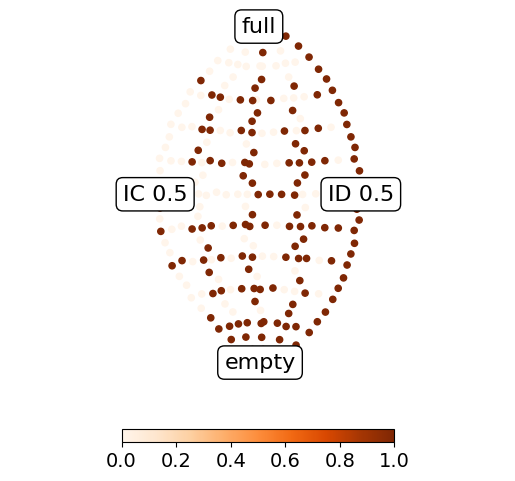

In [8]:

def my_feature(election) -> dict:
    """ implement your feature here """
    selected = np.random.choice(100, 6, replace=False)
    app = votes2approval(election)[:,selected]
    rule = axis.MinimalFlips(app)
    rule2 = axis.BallotCompletion(app)
    best_axis = rule.bruteforce()
    best_axis2 = rule2.bruteforce()
    score = 0
    if best_axis[0][0] == best_axis2[0][0]:
        score = 1

    return {'value': score}

experiment_id = 'resampling'    # or disjoint or noise or truncated_urn
distance_id = 'l1-approvalwise'
embedding_id = 'fr'
experiment = mapel.prepare_offline_approval_experiment(experiment_id=experiment_id,
                                                           distance_id=distance_id,
                                                           embedding_id=embedding_id)

experiment.add_feature('my_feature', my_feature)
experiment.compute_feature('my_feature')

experiment.print_map_2d_colored_by_feature(
        cmap='Oranges',
        feature_id='my_feature',
        textual=['empty', 'full', 'ID 0.5', 'IC 0.5'],
        rounding=2,
    )

100%|██████████| 241/241 [00:08<00:00, 29.78it/s]


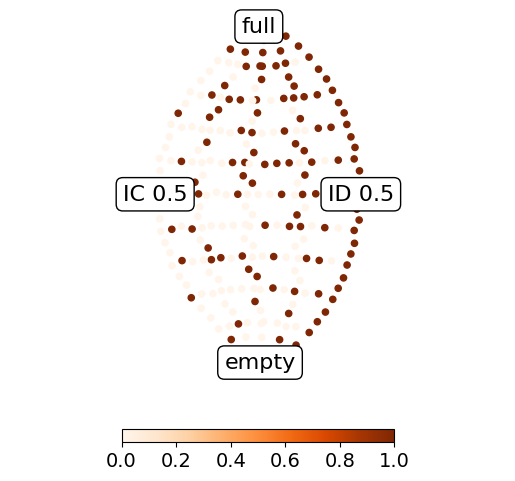

In [9]:

def my_feature(election) -> dict:
    """ implement your feature here """
    selected = np.random.choice(100, 6, replace=False)
    app = votes2approval(election)[:,selected]
    rule = axis.MinimalFlips(app)
    rule2 = axis.VoterDeletion(app)
    best_axis = rule.bruteforce()
    best_axis2 = rule2.bruteforce()
    score = 0
    if best_axis[0][0] == best_axis2[0][0]:
        score = 1

    return {'value': score}

experiment_id = 'resampling'    # or disjoint or noise or truncated_urn
distance_id = 'l1-approvalwise'
embedding_id = 'fr'
experiment = mapel.prepare_offline_approval_experiment(experiment_id=experiment_id,
                                                           distance_id=distance_id,
                                                           embedding_id=embedding_id)

experiment.add_feature('my_feature', my_feature)
experiment.compute_feature('my_feature')

experiment.print_map_2d_colored_by_feature(
        cmap='Oranges',
        feature_id='my_feature',
        textual=['empty', 'full', 'ID 0.5', 'IC 0.5'],
        rounding=2,
    )

100%|██████████| 241/241 [01:23<00:00,  2.89it/s]


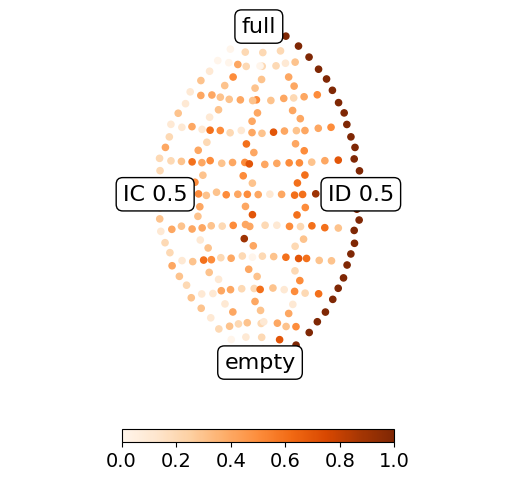

In [11]:

def my_feature(election) -> dict:
    """ implement your feature here """
    score = 0
    for _ in range(10):
        selected = np.random.choice(100, 6, replace=False)
        app = votes2approval(election)[:,selected]
        rule = axis.VoterDeletion(app)
        rule2 = axis.ForbiddenTriples(app)
        best_axis = rule.bruteforce()
        best_axis2 = rule2.bruteforce()
        if best_axis[0][0] == best_axis2[0][0]:
            score += 1

    return {'value': score/10}

experiment_id = 'resampling'    # or disjoint or noise or truncated_urn
distance_id = 'l1-approvalwise'
embedding_id = 'fr'
experiment = mapel.prepare_offline_approval_experiment(experiment_id=experiment_id,
                                                           distance_id=distance_id,
                                                           embedding_id=embedding_id)

experiment.add_feature('my_feature', my_feature)
experiment.compute_feature('my_feature')

experiment.print_map_2d_colored_by_feature(
        cmap='Oranges',
        feature_id='my_feature',
        textual=['empty', 'full', 'ID 0.5', 'IC 0.5'],
        rounding=2,
    )